In [4]:
class Node:
    def __init__(self, char):
        self.char = char
        self.left = None
        self.eq = None
        self.right = None
        self.is_end_of_word = False


class TernarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, word):
        if not word:
            return
        self.root = self._insert(self.root, word, 0)

    def _insert(self, node, word, index):
        char = word[index]

        if node is None:
            node = Node(char)

        if char < node.char:
            node.left = self._insert(node.left, word, index)
        elif char > node.char:
            node.right = self._insert(node.right, word, index)
        else:
            if index + 1 < len(word):
                node.eq = self._insert(node.eq, word, index + 1)
            else:
                node.is_end_of_word = True
        return node

 
    def search(self, word):
        return self._search(self.root, word, 0)
    def _search(self, node, word, index):
        if not node:
            return False
        char = word[index]
        if char < node.char:
            return self._search(node.left, word, index)
        elif char > node.char:
            return self._search(node.right, word, index)
        else:
            if index + 1 == len(word):
                return node.is_end_of_word
            return self._search(node.eq, word, index + 1)

### Example 

In [3]:
# Create TST and insert words
tst = TernarySearchTree()
words_to_insert = ["cat", "cap", "cape", "can", "dog", "dot", "dove", "apple"]

for word in words_to_insert:
    tst.insert(word)

print("Words inserted.")


Words inserted.


In [4]:
##### Search for words
# Words that should be found
found_words = ["cat", "cap", "cape", "can", "dog", "dot", "dove", "apple"]

for word in found_words:
    result = tst.search(word)
    print(f"Search '{word}': {'✅ Found' if result else '❌ Not Found'}")


Search 'cat': ✅ Found
Search 'cap': ✅ Found
Search 'cape': ✅ Found
Search 'can': ✅ Found
Search 'dog': ✅ Found
Search 'dot': ✅ Found
Search 'dove': ✅ Found
Search 'apple': ✅ Found


In [7]:
tst.insert('abc')

In [8]:
# Load words from the insert_words.txt file and insert into the tree
file_path = r"D:\SEMESTER-2\Concepts Of Data Science\PROJECT\data (1)\data\search_trees\insert_words.txt"

# Initialize TST
tst = TernarySearchTree()

# Insert words from file
with open(file_path, 'r') as file:
    count = 0
    for line in file:
        word = line.strip()
        if word:  # skip empty lines
            tst.insert(word)
            count += 1

print(f"{count} words inserted into the Ternary Search Tree.")


22 words inserted into the Ternary Search Tree.


In [10]:
with open(file_path, 'r') as file:
    unique_words = set(word.strip() for word in file if word.strip())

for word in unique_words:
    tst.insert(word)

print(f"Total unique words inserted: {len(unique_words)}")


Total unique words inserted: 20


In [11]:
# Sample words inserted
words_inserted = ["cat", "bat", "car", "can", "cap", "cape"]

# Insert into TST
tst = TernarySearchTree()
for word in words_inserted:
    tst.insert(word)

# Check full words
print("🔍 Exact Match Tests:")
for word in words_inserted:
    print(f"Search '{word}': {'✅ Found' if tst.search(word) else '❌ Not Found'}")

# Now check that prefixes are not found
print("\n🔍 Prefix Match (should NOT be found):")
prefixes = ["ca", "ba", "cap", "ca", "c", "b", "baton", "catt"]

for prefix in prefixes:
    if prefix not in words_inserted:
        print(f"Search '{prefix}': {'❌ Not Found' if not tst.search(prefix) else '🚫 Wrongly Found'}")


🔍 Exact Match Tests:
Search 'cat': ✅ Found
Search 'bat': ✅ Found
Search 'car': ✅ Found
Search 'can': ✅ Found
Search 'cap': ✅ Found
Search 'cape': ✅ Found

🔍 Prefix Match (should NOT be found):
Search 'ca': ❌ Not Found
Search 'ba': ❌ Not Found
Search 'ca': ❌ Not Found
Search 'c': ❌ Not Found
Search 'b': ❌ Not Found
Search 'baton': ❌ Not Found
Search 'catt': ❌ Not Found


✅ Loaded 58110 words.
✅ Benchmarking complete.


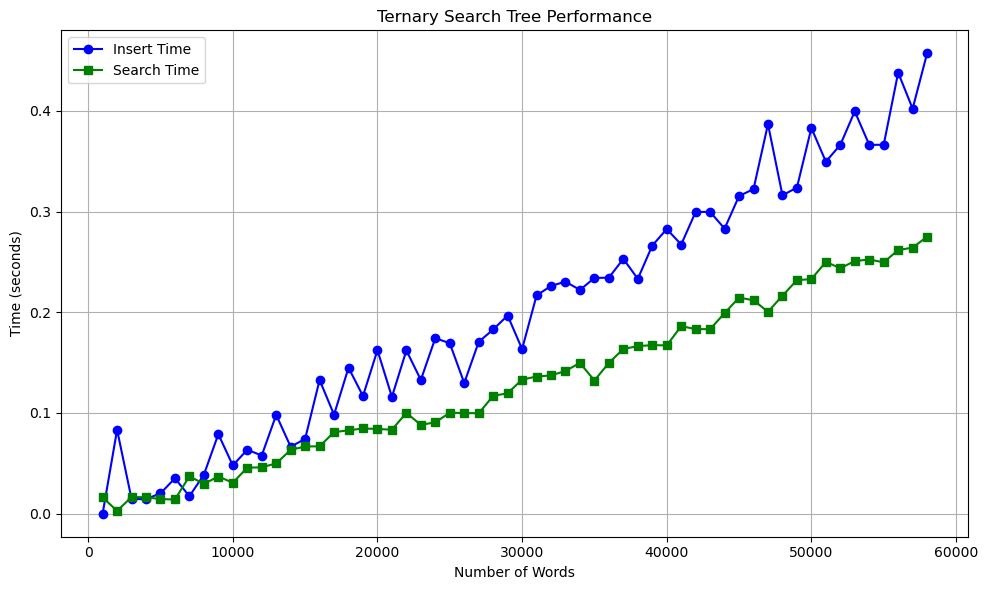

In [5]:
import time
import matplotlib.pyplot as plt

# Load words from file
file_path = r"D:\SEMESTER-2\Concepts Of Data Science\PROJECT\Concept-of-Data-Science-\search_trees\corncob_lowercase.txt"

with open(file_path, 'r') as file:
    all_words = [line.strip() for line in file if line.strip()]

print(f"✅ Loaded {len(all_words)} words.")

# Benchmark parameters
insert_times = []
search_times = []
word_counts = []

# Choose how many words to increase by per step
step = 1000

# Run benchmark loop
for i in range(step, len(all_words), step):
    subset = all_words[:i]

    # Measure insert time
    tst = TernarySearchTree()
    start_insert = time.time()
    for word in subset:
        tst.insert(word)
    end_insert = time.time()

    # Measure search time
    start_search = time.time()
    for word in subset:
        tst.search(word)
    end_search = time.time()

    # Record
    insert_times.append(end_insert - start_insert)
    search_times.append(end_search - start_search)
    word_counts.append(i)

print("✅ Benchmarking complete.")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(word_counts, insert_times, label='Insert Time', marker='o', color='blue')
plt.plot(word_counts, search_times, label='Search Time', marker='s', color='green')
plt.xlabel("Number of Words")
plt.ylabel("Time (seconds)")
plt.title("Ternary Search Tree Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
